# Entropy!

v1.0 (2018 Spring) Tavor Baharav, Kaylee Burns, Gary Cheng, Sinho Chewi, Hemang Jangle, William Gan, Alvin Kao, Chen Meng, Vrettos Muolos, Kanaad Parvate, Ray Ramamurti

## <font color = blue>$\mathcal{Q}$1. Huffman Codes.</font>

Ben Bitdiddle is an avid coinflipper. He and his friend Alice enjoy sending each other the results of their coinflipping escapades, but unfortunately, they have a very minimal data plan. In order to get around this, Ben decides to try and $\textit{compress}$ the sequence of coinflips he wants to communicate to Alice before sending it. He settles on his favorite method, Huffman Coding. He solidifies his scheme as follows:
1. Flip a coin with heads (1) bias $p$ and record its value $M$ times.
2. Encode and send the sequence of $M$ coin flips as a binary string using a Huffman code based on the coin flip frequencies determined by the hash table probDict you will generate. He's not sure how many coin flips he wants to group together as a single encoding symbol, so he leaves that as a variable $n$ for now.

Before attempting this section, brush up on (or learn for the first time) <a href="https://www.siggraph.org/education/materials/HyperGraph/video/mpeg/mpegfaq/huffman_tutorial.html">Huffman coding</a>.

### <font color=blue>a. Implement a method generateProbabilities that, given $n,p$, outputs a dictionary mapping sequences of $n$ coinflips to their associated probabilities. </font>

In [10]:
import numpy as np
import scipy.stats
import scipy
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
def generateProbabilities(p,n):
    """Return a dictionary (probDict) which maps all 2**n possible sequences of n coin flips to their
        probability, given a heads (1) bias of p
        generateProbabilities(.9,2) = {'00': .01, '01': .09, '10': .09, '11': .81}"""
    
    probDict = {}

    ### Your code here
    def fill_dict(current, i, probability):
        nonlocal probDict
        if i == n:
            probDict[current] = probability
        else:
            fill_dict(current + '0', i + 1, probability * (1 - p))
            fill_dict(current + '1', i + 1, probability * p)
        
    fill_dict('', 0, 1)
    
    return probDict

In [3]:
generateProbabilities(.9, 2)

{'00': 0.009999999999999995,
 '01': 0.08999999999999998,
 '10': 0.08999999999999998,
 '11': 0.81}

### <font color=blue>b. Implement a method HuffEncode that, given a list of frequencies, will output the corresponding mapping of input symbol to Huffman codewords. Write a subsequent method encode_string that encodes a string given $n$ and the huffman dictionary.</font>

In [165]:
### imports: heapq might be useful
import queue

def HuffEncode(freq_dict):
    """Return a dictionary (flips2huff) which maps keys from the input dictionary freq_dict
       to bitstrings using a Huffman code based on the frequencies of each key"""
    
    def huffman_tree():
        count = 0
        frequencies = queue.PriorityQueue()
        for symbol, freq in freq_dict.items():
            frequencies.put([freq, count, symbol])
            count += 1

        while not frequencies.empty():
            first = frequencies.get()
            # print('first:', first)

            if frequencies.empty():
                return first

            second = frequencies.get()
            # print('second:', second)
            
            combined = [first[0] + second[0], [first[2], second[2]]]
            # print('combined:', combined)
            
            frequencies.put([first[0] + second[0], count, [first[2], second[2]]])
            count += 1
            # print('queue:', frequencies.queue)
            # print()
        
    flips2huff = {}
    
    def traverse(huff_tree, bitstring):
        if not isinstance(huff_tree, list):
            flips2huff[str(huff_tree)] = bitstring
        else:
            traverse(huff_tree[0], bitstring + '0')
            traverse(huff_tree[1], bitstring + '1')
    
    tree = huffman_tree()
    # print(tree[2])
    traverse(tree[2], '')
    
    # Your Beautiful Code Here
    return flips2huff
        

def encode_string(string, flip2huff,n):
    """Return a bitstring encoded according to the Huffman code defined in the dictionary flip2huff.
    We assume the length of string divides n"""
    
    # Your Beautiful Code Here    
    bitstring = ''
    for i in range(0, len(string), n):
        bitstring += flip2huff[string[i: i + n]]
    
    return bitstring

entropy = lambda x : -x*np.log2(x) - (1-x)*np.log2(1-x)

In [153]:
frequencies = {1: 5, 2: 7, 3: 10, 4: 15, 5: 20, 6: 45}

In [166]:
HuffEncode(frequencies)

{'1': '1010', '2': '1011', '3': '100', '4': '110', '5': '111', '6': '0'}

In [167]:
encode_string('123456', HuffEncode(frequencies), 1)

'101010111001101110'

### <font color=blue>c. Plot Generation</font>
Ben isn't sure what value of $n$ to pick, so he decides to test his compression scheme using different values of $n$.

Using the functions you wrote above, lets run some simulations! In order to find the best $n$, plot $n$ on your x axis, and fraction of bits we need to use $\left( \frac{\text{Compressed Length}}{\text{Uncompressed length}} \right)$ on the y axis. For each setting, average over 100 trials to reduce noise. Generate plots for p = .5,.75,.97 (3 total plots). For each plot, use:

$n = 1,2,...,15$

$M \approx 1000$ (this is to avoid truncation errors, e.g. for n=3, use 1002).



In [168]:
import random

In [183]:
### Your beautiful simulation code here

p_list = [0.5, 0.75, .97] #coin '1' bias
nVals = range(1,16) #encode n coin flips

numFlips = 1000
numTrials = 100

averageCompression = []
for i in range(len(p_list)):
    p = p_list[i]
    for n in nVals:
        # print('n:', n)
        # print('p:', p)
        probDict = generateProbabilities(p,n)

        flip2huff = HuffEncode(probDict)

        total_fraction = 0
        
        numFlipsP = ((numFlips-1)//n + 1) * n # to prevent truncation in the encoding
        
        for _ in range(numTrials):
            ### your code here
            flips = ''
            for i in range(numFlipsP):
                flips += '1' if random.random() < p else '0'
                
            compressed = encode_string(flips, flip2huff, n)
            
            fraction = len(compressed) / numFlipsP
            total_fraction += fraction
        
        averageCompression.append(total_fraction / numTrials)

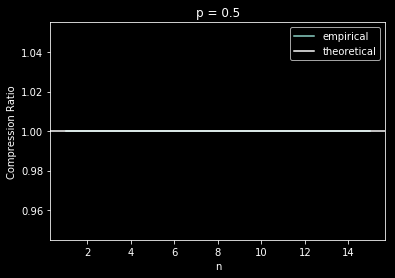

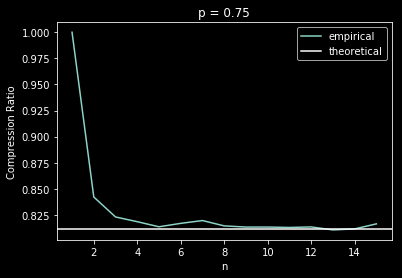

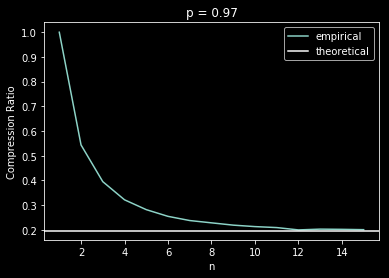

In [194]:
### Plot the three graphs here
plt.style.use('dark_background')

for i in range(len(p_list)):
    plt.figure()
    p = p_list[i]
    plt.title('p = ' + str(p))
    plt.xlabel('n')
    plt.ylabel('Compression Ratio')
    plt.plot(nVals, averageCompression[i * len(nVals) : (i + 1) * len(nVals)], label='empirical')
    plt.axhline(y=entropy(p), label='theoretical')
    plt.legend()

In [186]:
averageCompression

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.8421699999999999,
 0.8230538922155689,
 0.81852,
 0.8136599999999998,
 0.8169361277445106,
 0.8196203796203794,
 0.8145100000000001,
 0.8133829365079365,
 0.81339,
 0.8130069930069928,
 0.8135019841269842,
 0.8106493506493504,
 0.8116170634920636,
 0.8164477611940301,
 1.0,
 0.54375,
 0.39516966067864273,
 0.32164999999999994,
 0.28184999999999993,
 0.25469061876247506,
 0.2377222777222776,
 0.22841000000000009,
 0.21911706349206336,
 0.21316000000000002,
 0.20924075924075924,
 0.19976190476190478,
 0.20291708291708294,
 0.20207341269841275,
 0.20075621890547266]

Ben shows this graph to Alice, surprised that his compression ratio keeps improving as he increases $n$, and seems to be asymptoting. Alice tells him of course, and that there exists an information theoretic lower bound.
### <font color=blue>d. Find the relevant information theoretic lower bound, and add it as a horizontal line to your 3 plots above.</font>

$H(p)$

"Wow, this is great!" Ben exclaims. He suggests continuing to increase $n$, to keep improving the compression ratio. Alice tells him that there's a serious problem with this.

### <font color=blue>e. What issue arises as $n$ becomes large?</font>

Compression ratio is limited, space needed as as $n \to \infty$ increases exponentially in the Huffman tree.

## <font color = blue>$\mathcal{Q}$2. Typical Sets.</font>
We will now explore the notion of $\textit{Typical Sets}$, as covered in the homework. This will help solidify your understanding of entropy, and your understanding of Shannon's theorem. As you recall from the homework, $\textit{Typical Sets}$ includes all the events with a probability within the range of ($2^{-n(H(p) + \epsilon)}$, $2^{-n(H(p) - \epsilon)}$).

### <font color = blue> a. Plotting</font>
For $p=.6$, $n=10,...,500$, determine which elements would appear in the typical set $A_\epsilon^{(n)}$, for $\epsilon = .02$. Generate 3 plots with $n$ on the x axis, one with the probability of the typical set $P(A_\epsilon^{(n)})$ on the y axis, another with $\frac{1}{n} \log_2 |A_\epsilon^{(n)}|$, and a third with the fraction of events in the typical set $\frac{A_\epsilon^{(n)}}{2^n}$.

In [245]:
p = .6
epsilon = .02

lower = lambda n: 2 ** (-n * (entropy(p) + epsilon))
upper = lambda n: 2 ** (-n * (entropy(p) - epsilon))

def find_ranges(n, p):
    current_lower = lower(n)
    current_upper = upper(n)
    
    low = None
    high = None
    
    for i in range(n):
        prob = (p ** i) * (1 - p) ** (n - i)
        if prob >= current_lower and low is None:
            low = i
        if prob > current_upper and high is None:
            high = i
            break
            
    return low, high

In [246]:
find_ranges(10, p)

(6, 7)

/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2


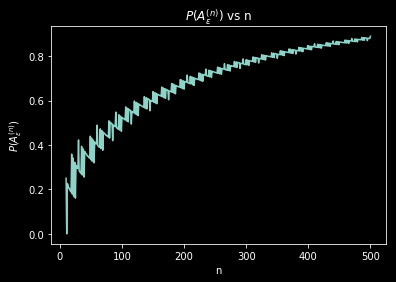

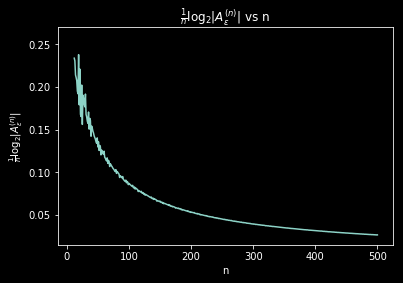

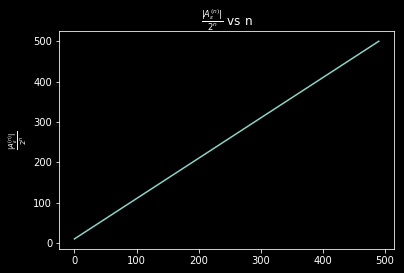

In [270]:
# Your computation / plotting code here
typical_set_p = []
typical_set_size_log = []
typical_set_fraction = []

n = range(10, 501)

for i in n:
    low, high = find_ranges(i, p)
    
    prob = 0
    size = 0
    
    for val in range(low, high):
        prob += scipy.stats.binom.pmf(val, i, p)
        size += val
        
    typical_set_p.append(prob)
    typical_set_size_log.append(1 / i * np.log2(size))
    typical_set_fraction.append(size / (2 ** i))

plt.figure()
plt.title(r'$P(A_{\epsilon}^{(n)})$ vs n')
plt.xlabel('n')
plt.ylabel(r'$P(A_{\epsilon}^{(n)})$')
plt.plot(n, typical_set_p)

plt.figure()
plt.title(r'$\frac{1}{n} \log_{2}{|A_{\epsilon}^{(n)}|}$ vs n')
plt.xlabel('n')
plt.ylabel(r'$\frac{1}{n} \log_{2}{|A_{\epsilon}^{(n)}|}$')
plt.plot(n, typical_set_size_log)

plt.figure()
plt.title(r'$\frac{|A_{\epsilon}^{(n)}|}{2^{n}}$ vs n')
plt.xlabel('')
plt.ylabel(r'$\frac{|A_{\epsilon}^{(n)}|}{2^{n}}$')
plt.plot(n, )

One way of thinking about the typical set asymptotically is that our compression function simply indexes each element in the typical set, numbering them $1,2,...,2^{nH(p)}$ ($nH(p)$ bits). All sequences outside of this typical set, we leave encoded as they are (n bits). If we look at the expected number of bits required to represent an symbol drawn according to the underlying distribution, we get

$$\begin{align}
\mathbb{E} [\text{len}(x)] 
&= P(x \in A_\epsilon^{(n)}) \cdot \mathbb{E} [\text{len}(x) | x \in A_\epsilon^{(n)}] + P(x \notin A_\epsilon^{(n)}) \cdot \mathbb{E} [\text{len}(x) | x \notin A_\epsilon^{(n)}]\\
&= P(x \in A_\epsilon^{(n)}) \cdot nH(p) + P(x \notin A_\epsilon^{(n)}) \cdot n\\
& \hspace{-.2cm} \overset{n \rightarrow \infty}{=} 1 \cdot n H(p) + 0 \cdot n\\
&= nH(p)
\end{align}$$

### <font color = blue> b. Observations</font>

Describe the asymptotic behavior of your 3 graphs.

The graph of $P(A_{\epsilon}^{(n)})$ vs n grows logarithmically, while the graph of $\frac{1}{n} \log_{2}{|A_{\epsilon}^{(n)}|}$ vs n decays exponentially and the graph of $\frac{|A_{\epsilon}^{(n)}|}{2^{n}}$ vs n grows linearly.

## Q3) Entropy and Information Content

In the previous questions, we saw entropy being used as a limit for the extent we can compress a source of data. Now, we will explore an alternative interpretation of entropy as the amount of information contained in a random source.

### Consider the following problem; we have 8 bins, numbered 1 through 8. There is a prize in exactly one of the bins, and each bin is equally likely to contain the prize. We'd like to figure out what which bin contains the prize, but we can only ask questions of the form "Is the bin number in $S$?" for some $S \subseteq \{1,2,3,4,5,6,7,8\}$.

### <font color = blue> a) With an optimal strategy, what is the expected number of questions we would need to ask, assuming that we get feedback after every question? Describe the sequence of questions we would ask, depending on what feedback we get.

3 questions expected. Ask questions akin to binary searching for the prize in the bins. In particular, ask whether the prize is in the first half of the bins and then ask again in the corresponding half that the prize is in, such that we narrow down the possible options in half each time. This results in 3 questions to narrow the prize down exactly, since $\log_{2}{8} = 3$.

### <font color = blue> b) Let $X$ be a random variable for the number of the bin containing the ball. What is the entropy of $X$? (Use a logarithm of base 2.) How does this compare to the expected number of questions we asked?

$$-\sum_{i = 1}^{8} \frac{1}{8} \log_{2}{\frac{1}{8}} = \log_{2}{8} = 3$$

They are exactly equal.

### <font color = blue> c) Now consider the case where we have prior probabilities on how likely each bin is to contain the prize. Describe how we could use Huffman coding to find an efficient series of questions to ask, in order to figure out which bin contains the prize. (In fact, one can show that using Huffman coding helps you determine the optimal sequence of questions to ask.)

Use Huffman coding to find the optimal questions to ask by considering the most likely options first. In particular, build the Huffman tree by using the probabilities as the frequencies and combine the two smallest probabilities into a subtree on each iteration. The questions we will need to ask then are which subtree of the Huffman tree the prize is in and recurse into the corresponding subtree.

### <font color = blue> d) Let's look at a specific instance of this problem, where the bins have probabilities [0.4, 0.15, 0.12, 0.11, 0.07, 0.06, 0.05, 0.04] of containing the prize. Use your method HuffEncode from the previous question to calculate the expected number of questions you have to ask in order to determine which bin contains the prize, using this approach.

In [304]:
dist = {1: .4, 2: .15, 3: .12, 4: .11, 5: .07, 6: .06, 7: .05, 8: .04}

def huff_questions(dist):
    huff = HuffEncode(dist)
    num_questions = 0

    for key, val in huff.items():
        num_questions += dist[int(key)] * len(val)
        
    return num_questions

In [305]:
huff_questions(dist)

2.6199999999999997

### <font color = blue> e) Repeat part b) for this new scenario, and compare your answer to the answer you obtained in the previous part.

In [306]:
def calc_entropy(dist):
    dist_entropy = 0

    for val in dist.values():
        dist_entropy += val * math.log2(val)
    
    return -dist_entropy

In [307]:
calc_entropy(dist)

2.5706093850101905

In [308]:
huff_questions(dist) - calc_entropy(dist)

0.04939061498980912

The entropy of the new distribution is less than that of the uniform distribution in part b).

### <font color = blue> f) Try a few more distributions, and compare the expected number of questions you need to ask with Huffman Coding to the entropy of the distribution, $H(X)$. Provide observed bounds for expected number of question with respect to $H(X)$.

In [297]:
def test_dist(dist):
    print('expected questions:', huff_questions(dist))
    print('entropy:', calc_entropy(dist))
    print('diff:', huff_questions(dist) - calc_entropy(dist))

In [298]:
test_dist({1: .5, 2: .05, 3: .12, 4: .11, 5: .07, 6: .06, 7: .05, 8: .04})

expected questions: 2.36
entropy: 2.347389712674683
diff: 0.012610287325316882


In [299]:
test_dist({1: .5, 2: .05, 3: .02, 4: .21, 5: .07, 6: .06, 7: .05, 8: .04})

expected questions: 2.24
entropy: 2.2157360320277846
diff: 0.02426396797221564


In [300]:
test_dist({1: .5, 2: .05, 3: .02, 4: .11, 5: .07, 6: .06, 7: .05, 8: .14})

expected questions: 2.32
entropy: 2.3045555236731574
diff: 0.015444476326842427


In [301]:
test_dist({1: .5, 2: .15, 3: .02, 4: .11, 5: .07, 6: .06, 7: .05, 8: .04})

expected questions: 2.3
entropy: 2.2876480281643117
diff: 0.012351971835688147


In [302]:
test_dist({1: .5, 2: .15, 3: .12, 4: .01, 5: .07, 6: .06, 7: .05, 8: .04})

expected questions: 2.2800000000000002
entropy: 2.2579900061278755
diff: 0.022009993872124767


The expected number of questions needed to be asked approaches the entropy of the distribution $H(X)$. $0.05 \cdot H(X) \geq \mathbb{E}[Q_{X}] \geq H(X)$, where $Q_{X}$ is the number of questions needed to be asked with Huffman coding for a distribution $X$.